# Recognition of Hand-Written Digits
- Using the MINIST dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import load_digits

from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics

## Load Digits Data
- 3-D array of 1797 samples with 8x8 grid of pixels

In [2]:
# Load data and list the attributes of the "Bunch" object
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [3]:
# Look at digits data attribute (array of 64 elements)
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [4]:
# Flattened out features (8x8) images
digits.data.shape

(1797, 64)

In [5]:
# 1797 of 8x8 Images
digits.images.shape

(1797, 8, 8)

In [6]:
# Targets are 0-9 digits
digits.target[0:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
# Target names for 0-9 digits
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
# 1797 targets corresponding to data
digits.target.shape

(1797,)

### Visualize Part of the Data
- Look at first 100 digits

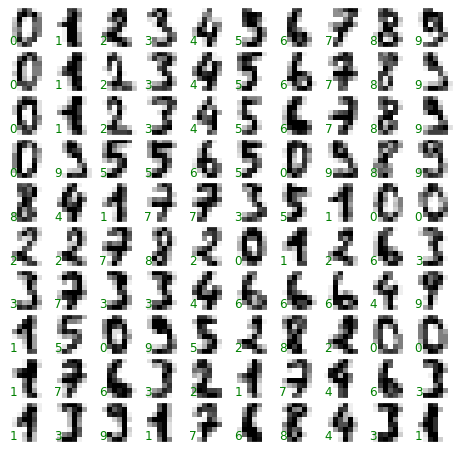

In [9]:
fig, axes = plt.subplots(10,10, figsize=(8,8), 
                         subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw={'hspace':0.1, 'wspace':0.1})

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')

---

## Train-Test Split Data Patrition

In [10]:
# Assign Features and Target
X = digits.data
y = digits.target

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (1797, 64)
y shape: (1797,)


### Split Data into Train and Test
- Split Dataset into Training set and Testing set
- Train the Model on the Training set
- Test the Model on the Testing set

In [11]:
# Split by 25% Testing, 75% Training (Default)
# set seed with random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1347, 64)
X_test shape: (450, 64)
y_train shape: (1347,)
y_test shape: (450,)


### Train the Model on the Training Set

In [12]:
# Initiate the Naive Bayes Model using default parameters
nb_model = GaussianNB()

# Fit the Model on Training Set
nb_model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### Look at trained Model's attributes

In [13]:
# Probability of each class
nb_model.class_prior_

array([0.10467706, 0.10319228, 0.09873794, 0.10244989, 0.10616184,
       0.09948033, 0.09576837, 0.09725316, 0.0935412 , 0.09873794])

### Predict on the Testing Set

In [14]:
# Predict on new testing data
y_pred = nb_model.predict(X_test)

### Look at Accuracy of Prediction

In [15]:
# Use *metrics* module to check accuracy
metrics.accuracy_score(y_test, y_pred)

0.8333333333333334

### Look at a Confusion Matrix

Text(77.10000000000001, 0.5, 'True Value')

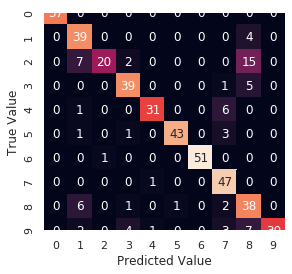

In [16]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, square=True, annot=True, cbar=False)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')

---

## Cross Validation with scikit-learn
- Split the dataset into equal K-folds
- Use 1 fold as a Testing set, the rest of the folds as a Training set
- Train on Training set, Predict on Testing set, and Calculate Testing Accuracy
- Repeat again K times, using different fold as a testing set
- Use Average Testing Acuracy as an estimate of out-of-sample accuracy

In [17]:
# Initiate the Naive Bayes Model using default parameters
nb_model = GaussianNB()

# 10-fold CV 
scores = cross_val_score(estimator=nb_model, X=X, y=y, cv=10, scoring='accuracy')

# Use Average Accuracy as an estimate of out-of-sample accuracy
scores.mean()

0.8113904407200497

In [18]:
# 5-fold CV 
scores = cross_val_score(estimator=nb_model, X=X, y=y, cv=5, scoring='accuracy')

# Use Average Accuracy as an estimate of out-of-sample accuracy
scores.mean()

0.8069281956050759

---